In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
name_lookup = {
    'BEN': 'Bennet',
    'BUT': 'Buttigieg',
    'HAR': 'Harris',
    'SAN': 'Sanders',
    'GIL': 'Gillibrand',
    'SWA': 'Swalwell',
    'HIC': 'Hickenlooper',
    'YAN': 'Yand',
    'BID': 'Biden',
    'WIL': 'Williamson'
}

In [3]:
def spring_rank(G):
    G = np.array(G)
    k_in = np.sum(G, 0)
    k_out = np.sum(G, 1)
    
    K = np.diag(k_out + k_in)
    A = K - (G + G.T)
    B = k_out - k_in
        
    return np.transpose(np.linalg.lstsq(A, B, rcond=None)[0])

In [16]:
def read_int_list(file_path):
    return nx.read_edgelist(file_path, create_using=nx.DiGraph)

In [23]:
def is_higher(l, e1, e2):
    for e in l:
        if e == e1:
            return True
        elif e == e2:
            return False

def plot_vertical(G, names, ranks):
    pos = {n: (0,r) for n, r in zip(names, ranks)}
    correct_edges = []
    incorrect_edges = []

    for e in G.edges():
        if is_higher(names, e[0], e[1]):
            correct_edges.append(e)
        else:
            incorrect_edges.append(e)
            
    plt.figure(3,figsize=(12,12)) 
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
    nx.draw_networkx_edges(G, pos, correct_edges, arrowsize=0.000001, edge_color='#6AB6E2', alpha=.03, connectionstyle='arc3,rad=-0.3')
    nx.draw_networkx_edges(G, pos, incorrect_edges, arrowsize=0.000001, edge_color='#F63646', alpha=.03, connectionstyle='arc3,rad=-0.3')
    plt.show()

In [24]:
def main():
    G = read_int_list('data/dem-6-27-ints.txt')
    names = list(G.nodes())
    A = nx.to_numpy_matrix(G, order=names)
    ranks = spring_rank(A)
    ranks, names = zip(*sorted(zip(ranks, names), reverse=True))
    plot_vertical(G, names, ranks)

/home/eitri/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/eitri/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


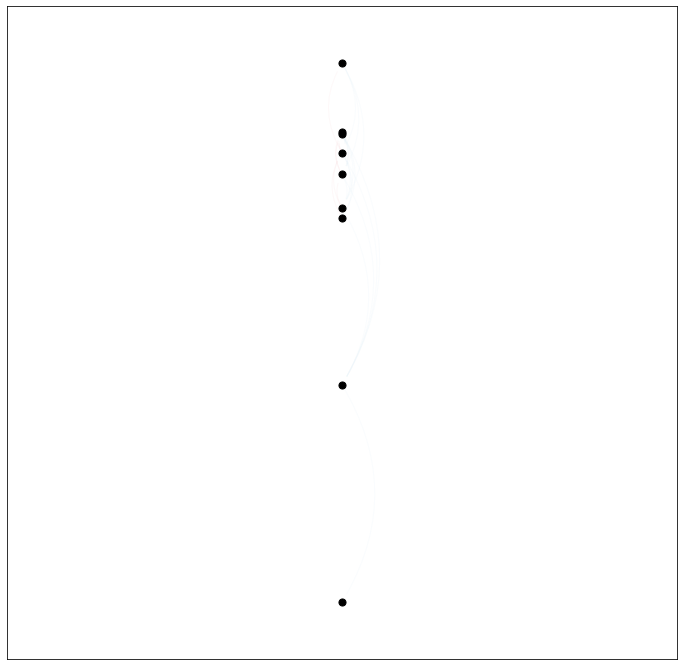

In [25]:
main()